## Curso - Data Visualization With Python - IBM Cognitive Class

#### Formação: Applied Data Science With Python

#### Victor Hugo Negrisoli - Desenvolvedor de Software Full-Stack & Analista de Dados¶

#### Módulo 1 - Introdução a ferramentas de visualização de dados em Python

In [167]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure

In [168]:
# Criando um gráfico de histograma utilizando a camada de Artista da Matplotlib
# Na camada de artista, define-se o Canvas que será gerado e várias de suas configurações

fig = Figure()
canvas = FigureCanvas(fig)

x = np.random.randn(10000)
ax = fig.add_subplot(111)
ax.hist(x, 100)
ax.set_title("Distribuição Normal com $\mu=0, \sigma=1$ - Artist Layer")
fig.savefig("imagens/modulo_1/Teste Histograma - Artist Layer.png")

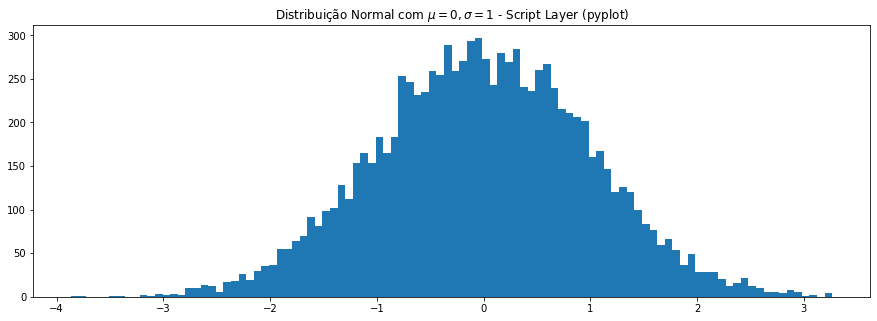

In [169]:
# Criando um gráfico de histograma utilizando a camada de Script da Matplotlib

plt.figure(figsize=(15,5)) 
plt.hist(x, 100)
plt.title("Distribuição Normal com $\mu=0, \sigma=1$ - Script Layer (pyplot)")
plt.savefig("imagens/modulo_1/Teste Histograma - Script Layer.png")
plt.show()

In [170]:
# Realizando uma plotagem com o built-in da Matplotlib do Pandas

# Criando um DataFrame de exemplo

df = pd.DataFrame({
    "india": [8880, 8670, 8147, 7338, 5704],
    "china": [5123, 6682, 3308, 1863, 1527]
})

df.head()

,india,china
0,8880,5123
1,8670,6682
2,8147,3308
3,7338,1863
4,5704,1527


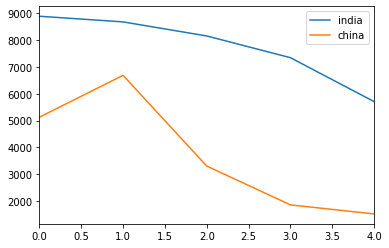

In [171]:
df.plot(kind = "line")

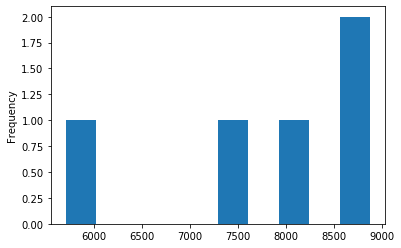

In [172]:
df["india"].plot(kind = "hist")

In [173]:
df = pd.read_excel(
    "dados/Canada.xlsx",
    sheet_name = "Canada by Citizenship",
    skiprows = range(20),
    skipfooter = 2
)

df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [174]:
# Remove colunas não utilizadas e renomeia outras

df.drop(['AREA','REG','DEV','Type','Coverage'], axis = 1, inplace = True)
df.rename(columns = {
    'OdName': 'Country', 
    'AreaName': 'Continent',
    'RegName': 'Region'}, 
    inplace = True)

# Seta a coluna Country como o índice do DataFrame

df.set_index('Country', inplace = True)

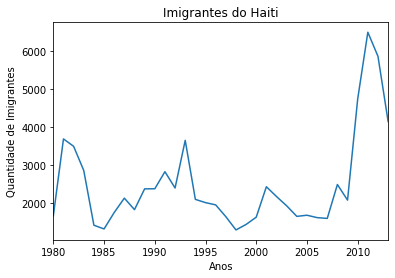

In [175]:
years = list(map(int, range(1980, 2014)))

# Aqui estamos pesquisando pelo índice Haiti, que é um índice do DataFrame, e recuperando todas as colunas de 1980 a 2013
# para plotar um gráfico de linhas

df.loc["Haiti", years].plot(kind = "line")

plt.title("Imigrantes do Haiti")
plt.xlabel("Anos")
plt.ylabel("Quantidade de Imigrantes")
plt.show()